In [1]:
# test notebook for calculations

import numpy as np
import scipy
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [19]:
a = [1., 4., -100.,3. , 10. ,-8.]
a = np.array(a)

def normalization_of_energies(vector_of_numbers):
    minimum = np.amin(vector_of_numbers)
    print(minimum)
    vector_of_numbers = vector_of_numbers + abs(minimum)
    print(vector_of_numbers)
    print(sum(vector_of_numbers))
    return vector_of_numbers/sum(vector_of_numbers)
    
normalization_of_energies(a)

-100.0
[101. 104.   0. 103. 110.  92.]
510.0


array([0.19803922, 0.20392157, 0.        , 0.20196078, 0.21568627,
       0.18039216])

In [32]:
#S_z component calculations 

from functools import reduce
from itertools import repeat, chain


def S_site(index, N, I, S):
    if index == 0: 
        chain_I = chain([S], repeat(I, N))
    elif index == N:
        chain_I = chain(repeat(I, N),[S])
    else:
        chain_I = chain(repeat(I, index), [S], repeat(I, N - index))
    return reduce(np.kron, chain_I)

def calc_Sz(psi):
    # Define the spin operator
    S_z = np.array([[1/2, 0], [0, -1/2]])
    
    I = np.array([[1,0],
                [0,1]])

    S_z = np.kron(np.kron(S_z,I),I)

    # Calculate the conjugate transpose of the wavefunction
    psi_dagger = np.conj(psi.T)
    # Calculate the expectation value of S_z
    Sz = np.dot(psi_dagger, np.dot(S_z, psi))
    return Sz


S_z = 1/2* np.array([[1,0],
                    [0,-1]])

S_plus = np.array([[0,1],
                    [0,0]])

S_minus = np.array([[0,0],
                    [1,0]])

I = np.array([[1,0],
                [0,1]])


N = 2
H = 0
for index in range(N):
    H += 1/2 * (np.dot(S_site(index, N, I, S_plus),S_site(index+1, N, I, S_minus)) \
        + np.dot(S_site(index, N, I, S_minus),S_site(index+1, N, I, S_plus))) + np.dot(S_site(index, N, I, S_z),S_site(index+1, N, I, S_z))

energies, vectors = np.linalg.eigh(H)
print("Len of Hamiltonian: ", len(H))
print(H)

print(energies)
print(vectors[0])

#vector 1 S_z: 
sum_s_z = []
for i in range(len(vectors)):
    sum_s_z.append(calc_Sz(vectors[i]))
print(sum_s_z)
print(sum(sum_s_z))

Len of Hamiltonian:  8
[[ 0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5  0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5]]
[-1.00000000e+00 -1.00000000e+00  2.04503993e-19  2.04503993e-19
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01]
[-0.  0.  0. -0.  0.  0.  1.  0.]
[-0.5, 0.16666666666666666, 0.16666666666666674, 0.16666666666666666, 0.16666666666666666, 0.16666666666666674, 0.16666666666666666, -0.5]
1.1102230246251565e-16


In [37]:
S_z_operator = chain([S_z], repeat(np.identity(2), 2))
print(reduce(np.kron,S_z_operator))

[[ 0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5 -0.  -0.  -0. ]
 [ 0.   0.   0.   0.  -0.  -0.5 -0.  -0. ]
 [ 0.   0.   0.   0.  -0.  -0.  -0.5 -0. ]
 [ 0.   0.   0.   0.  -0.  -0.  -0.  -0.5]]


In [19]:
import numpy as np

def calc_Sz(psi):
    # Define the spin operator
    S_z = np.array([[1/2, 0], [0, -1/2]])
    # Reshape the wavefunction into a 2x2 matrix
    psi = psi.reshape(2, 2)
    # Calculate the conjugate transpose of the wavefunction
    psi_dagger = np.conj(psi.T)
    # Calculate the expectation value of S_z
    Sz = np.dot(psi_dagger, np.dot(S_z, psi))
    return Sz[0,0].real

psi = np.array([0, 1, 0, 0])
Sz = calc_Sz(psi)
print("Expectation value of S_z:", Sz)

Expectation value of S_z: 0.0


In [2]:
np.zeros((2,2),dtype = complex)

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [5]:
def plot_bands(energies, title, figsize, s, ticks):
    x = list(range(len(energies)))
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(x, energies, c = 'black', s=s, marker="_", linewidth=2, zorder=3)
    tick_spacing = 1
    if ticks == False: 
        ax.set_xticks([])
    else:
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(tick_spacing))
    ax.grid(axis='y')
    ax.margins(0.1)
    ax.set_xlabel('index')
    ax.set_ylabel('E')
    ax.set_title(title)


In [6]:
np.kron(np.identity(0),np.array([[1,0],[0,1]]))

array([], shape=(0, 0), dtype=float64)

In [7]:
from functools import reduce
from itertools import repeat, chain


def S_site(index, N, I, S):
    if index == 0: 
        chain_I = chain([S], repeat(I, N))
    elif index == N:
        chain_I = chain(repeat(I, N),[S])
    else:
        chain_I = chain(repeat(I, index), [S], repeat(I, N - index))
    return reduce(np.kron, chain_I)

In [22]:
#test workin! 

#4 spiny:

# S_plus * I * I * I 
# I * S_plus * I * I
# I * I * S_plus * I
# I * I * I * S_plus
'''
S_plus = np.array([[0,1],
                    [0,0]])
S_minus = np.array([[0,0],                
                    [1,0]])
S_z = 1/2 * np.array([[1,0],
                    [0,-1]])
I = np.array([[1,0],
            [0,1]])
''';
S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[1,0,0],
                [0,0,0],
                [0,0,-1]])

I = np.array([[1,0,0],
                [0,1,0],
                [0,0,1]])

N = 1
H = 0
for index in range(N):
    H += 1/2 * (np.dot(S_site(index, N, I, S_plus),S_site(index+1, N, I, S_minus)) \
        + np.dot(S_site(index, N, I, S_minus),S_site(index+1, N, I, S_plus))) + np.dot(S_site(index, N, I, S_z),S_site(index+1, N, I, S_z))

energies, vectors = np.linalg.eigh(H)


[-3.00000000e+00 -3.00000000e+00 -3.00000000e+00 -2.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -6.62210246e-16  1.07085001e-16  1.35841063e-15]


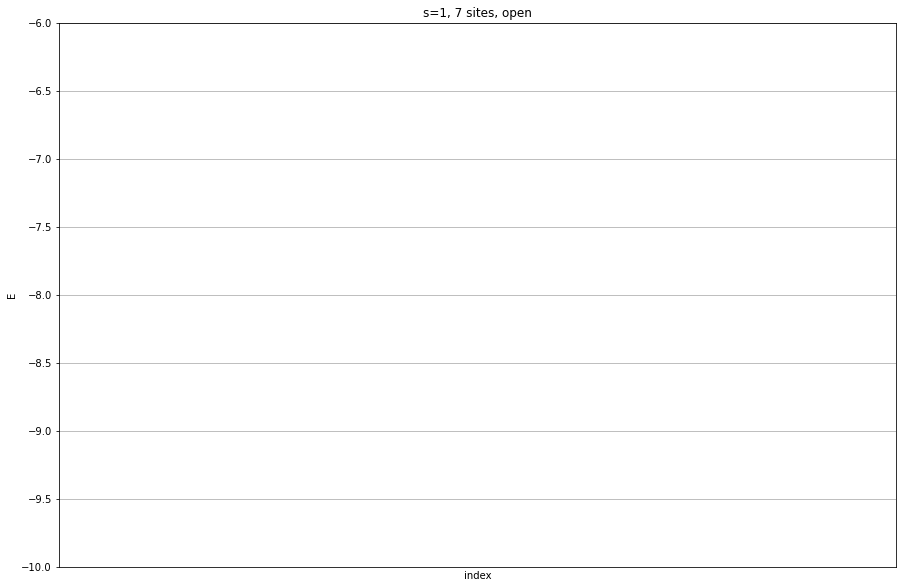

In [6]:
plot_bands(energies, title = "s=1, 7 sites, open", figsize=(15,10),s=50, ticks = False);
plt.axis([-2, 15, -10, -6]);
print(energies[0:15])

In [36]:
#check how about different implementation:
from functools import reduce
from itertools import repeat, chain


def S_site(index, N, S):
    size = len(S)
    if index == 0: 
        chain_I = chain([S], [np.identity(size**N)])
    elif index == N:
        chain_I = chain([np.identity(size**N)],[S])
    else:
        chain_I = chain([np.identity(size**index)], [S], [np.identity(size**(N - index))])
    return reduce(np.kron, chain_I)

S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[1,0,0],
                [0,0,0],
                [0,0,-1]])


N = 8
H = 0
for index in range(N):
    H += 1/2 * (np.dot(S_site(index, N, S_plus),S_site(index+1, N, S_minus)) \
        + np.dot(S_site(index, N, S_minus),S_site(index+1, N, S_plus))) + np.dot(S_site(index, N, S_z),S_site(index+1, N, S_z))

energies, vectors = np.linalg.eigh(H)

(-2.0, 15.0, -10.5, -8.5)

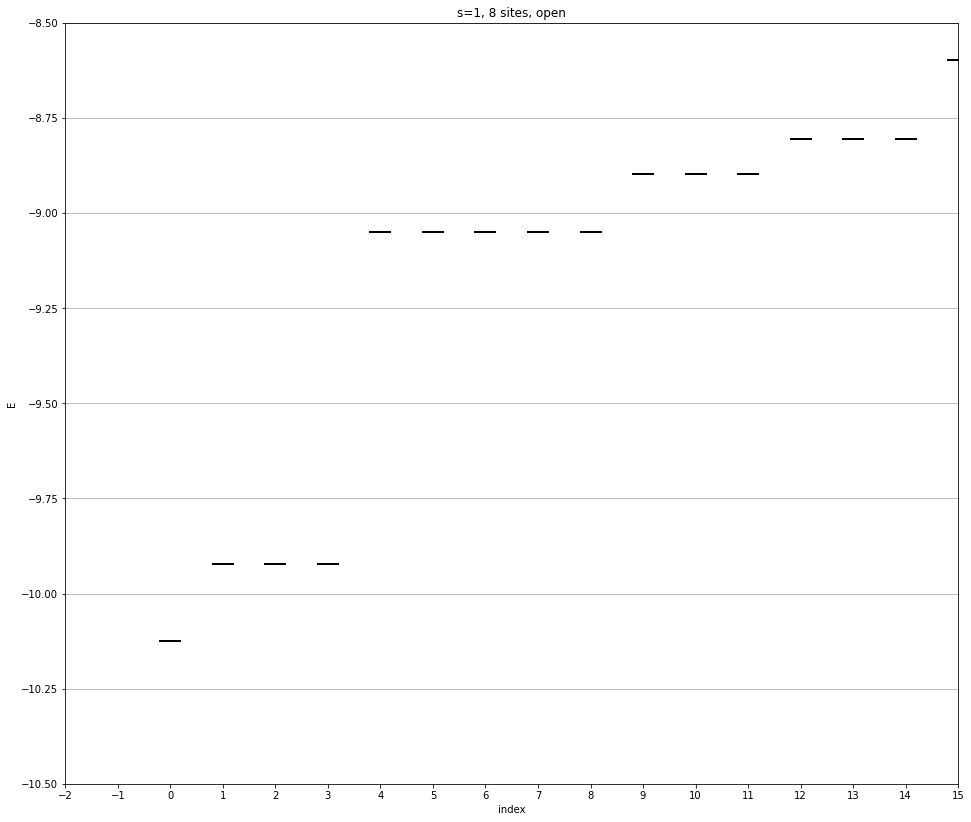

In [35]:
plot_bands(energies, title = "s=1, " + str(N+1) +" sites, open", figsize=(16,14),s=50, ticks = False)
#plt.axis([-2, 15, -10.5, -8.5])

[-2. -1. -1. -1.  1.  1.  1.  1.  1.]
[-3.00000000e+00 -3.00000000e+00 -3.00000000e+00 -2.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -6.62210246e-16  1.07085001e-16  1.35841063e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  2.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.00000000e+00  2.00000000e+00]


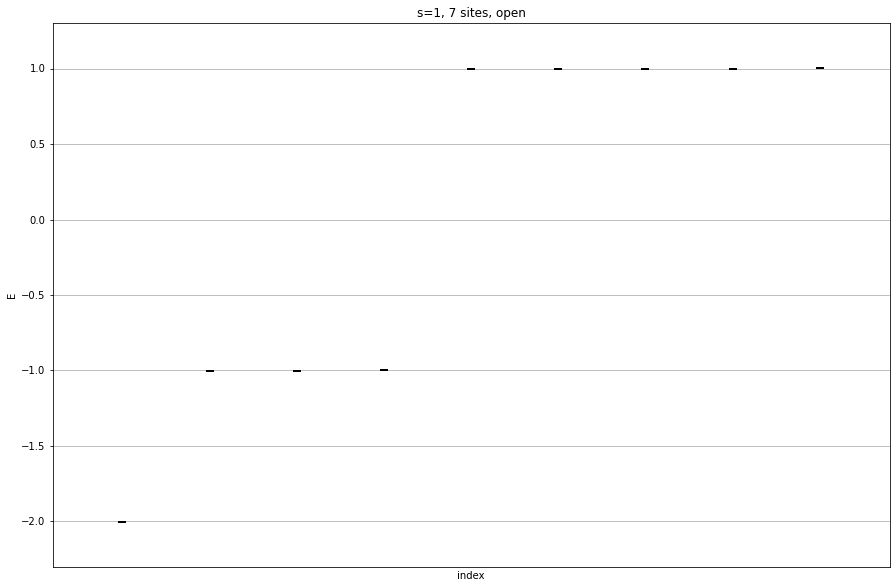

In [50]:
print(energies)
print(energies2)

plot_bands(energies, title = "s=1, 9 sites, open", figsize=(15,10),s=50, ticks = False)

### First step 

Heisenberg model for two spins (two sites) - single and 1/2 spin basis

In [4]:
#two sites for spin 1/2 from tutorial: 
S_x = np.array([[0,1],
                [1,0]])
S_y = np.array([[0,-1j],
                [1j,0]])
S_z = np.array([[1,0],
                [0,-1]])
I = np.array([[1,0],
                [0,1]])

H = 1/4 * (np.kron(S_x,S_x)+ (np.kron(S_y,S_y)) + (np.kron(S_z,S_z))-np.kron(I,I))

H
energies, vectors = np.linalg.eig(H)
print(energies)

[-2.46519033e-32+0.j -1.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j]


In [91]:
S_plus = np.array([[0,1],
                [0,0]])
S_minus = np.array([[0,0],                
                    [1,0]])
S_z = 1/2*np.array([[1,0],
                [0,-1]])

H = 1/2 * (np.kron(S_plus,S_minus)+ (np.kron(S_minus,S_plus))) + (np.kron(S_z,S_z))
energies, vectors = np.linalg.eigh(H)
print(energies)
#plot_bands(np.sort(energies),'2 sites, open, s = 1/2')
#plot_bands(energies,'2 sites, open, s = 1/2')

H_c = (np.kron(S_plus,S_minus)+ (np.kron(S_minus,S_plus))) + 2 * (np.kron(S_z,S_z)) #+ 1/2*(np.dot(np.kron(I,S_plus),(np.kron(S_minus,I))) + np.dot(np.kron(I,S_minus),(np.kron(S_plus,I))))+ (np.kron(S_z,S_z))
energies_c, vectors_c = np.linalg.eigh(H_c)
print(energies_c)
#plot_bands(energies_c,'2 sites, closed, s = 1/2')

'''
x = [1] * len(energies)
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('2 sites s = 1/2')
''';

#scipy.eigsh ? - do macierzy rzadkich (sparse matrix)
##### tworzenie operatorów na danym węźle 

#### macierz csr3 

[-0.75  0.25  0.25  0.25]
[-1.5  0.5  0.5  0.5]


In [33]:
print(H)

[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]


In [93]:
print(energies[3])
print(vectors[:,3])

0.25
[0. 0. 0. 1.]


In [36]:
np.sqrt(2)/2

0.7071067811865476

In [8]:
S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[1,0,0],
                [0,0,0],
                [0,0,-1]])

I = np.array([[1,0,0],
                [0,1,0],
                [0,0,1]])

In [45]:
S_plus

array([[0.        , 1.41421356, 0.        ],
       [0.        , 0.        , 1.41421356],
       [0.        , 0.        , 0.        ]])

In [46]:
S_minus

array([[0.        , 0.        , 0.        ],
       [1.41421356, 0.        , 0.        ],
       [0.        , 1.41421356, 0.        ]])

In [55]:
S_z

array([[ 1,  0,  0],
       [ 0,  0,  0],
       [ 0,  0, -1]])

In [48]:
#tensor product 
#one option: 
np.kron(S_plus,S_minus)

#second from Silvano tutorial: 
matrix_b = S_minus
matrix_a = S_plus

final_matrix = [[num_a * num_b for num_a in element_a for num_b in matrix_b[row]] for element_a in matrix_a for row in range(len(matrix_b))]


[-2. -1. -1. -1.  1.  1.  1.  1.  1.]
[-4. -2. -2. -2.  2.  2.  2.  2.  2.]


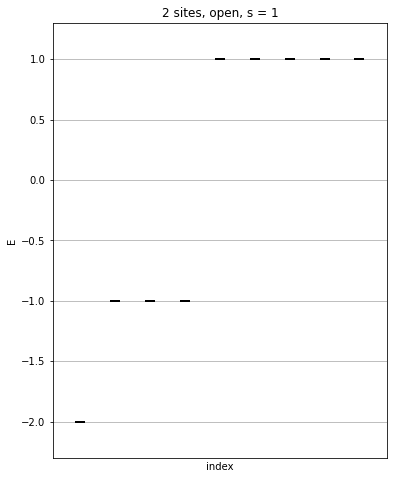

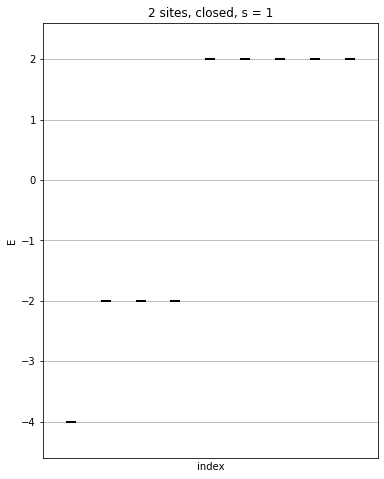

In [11]:
#HEISENBERG HAMILTONIAN TWO SITES, spin = 1 

S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[1,0,0],
                [0,0,0],
                [0,0,-1]])

I = np.array([[1,0,0],
                [0,1,0],
                [0,0,1]])

#first term
S_st = np.kron(S_plus,S_minus)
#second term
S_nd = np.kron(S_minus,S_plus)
#z term
S_z =  np.kron(S_z,S_z)

#print(S_st.shape,S_nd.shape,S_z.shape)

#Hamiltonian: 
H = 1/2 * (S_st + S_nd) + S_z
#print(H)

energies, vectors = np.linalg.eigh(H)
print(energies)

plot_bands(np.sort(energies),'2 sites, open, s = 1',figsize=(6,8),s=100, ticks = False)

#Hamiltonian: 
H_c = (S_st + S_nd) + 2*S_z
#print(H)

energies_c, vectors_c = np.linalg.eigh(H_c)
print(energies_c)

plot_bands(np.sort(energies_c),'2 sites, closed, s = 1',figsize=(6,8),s=100, ticks = False)

In [29]:
print(H)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [45]:
print(energies)

[-2. -1. -1. -1.  1.  1.  1.  1.  1.]


In [63]:
print(energies[8])
print(vectors[:,8])

1.0000000000000007
[ 0.          0.         -0.40824829  0.         -0.81649658  0.
 -0.40824829  0.          0.        ]


In [61]:
print(1/np.sqrt(3))
print(1/np.sqrt(2))
print(1/np.sqrt(6))
print(2/np.sqrt(6))

0.5773502691896258
0.7071067811865475
0.4082482904638631
0.8164965809277261


Text(0.5, 1.0, '2 sites s = 1')

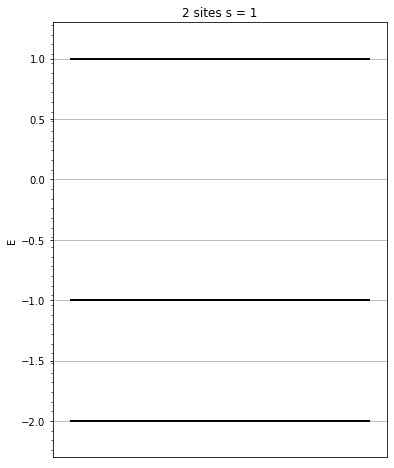

In [106]:
x = [1] * len(energies)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('2 sites s = 1')



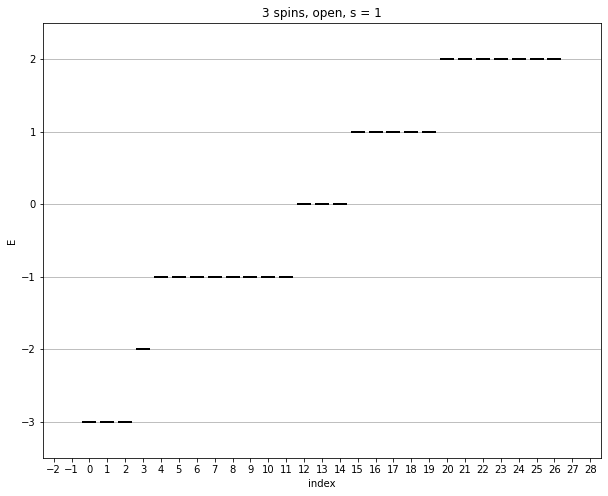

In [90]:
#HEISENBERG HAMILTONIAN 3 SITES, spin = 1 

from numpy import kron, dot

S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[1,0,0],
                [0,0,0],
                [0,0,-1]])

I = np.array([[1,0,0],
                [0,1,0],
                [0,0,1]])


S1_plus = kron(kron(S_plus,I),I)
S1_minus = kron(kron(S_minus,I),I)
S1_z = kron(kron(S_z,I),I)

S2_plus = kron(kron(I,S_plus),I)
S2_minus = kron(kron(I,S_minus),I)
S2_z = kron(kron(I,S_z),I)

S3_plus = kron(kron(I,I),S_plus)
S3_minus = kron(kron(I,I),S_minus)
S3_z = kron(kron(I,I),S_z)
'''
H = 0.5*(dot(S1_plus,S2_minus)+dot(S1_minus,S2_plus)+dot(S2_plus,S3_minus)+dot(S2_minus,S3_plus)\
    +dot(S3_plus,S1_minus)+dot(S3_minus,S1_plus)) + dot(S1_z,S2_z) + dot(S2_z,S3_z) + dot(S3_z,S1_z)

energies, vectors = np.linalg.eig(H)
print(np.sort(energies))
plot_bands(np.sort(energies),'3 spins, closed, s = 1')
''';

H_o = 0.5*(dot(S1_plus,S2_minus)+dot(S1_minus,S2_plus)+dot(S2_plus,S3_minus)+dot(S2_minus,S3_plus)) + dot(S1_z,S2_z) + dot(S2_z,S3_z)

energies_o, vectors_o = np.linalg.eigh(H_o)
plot_bands(energies_o,'3 spins, open, s = 1', figsize = (10,8), s = 200)

"""x = [1] * len(energies)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('3 sites s = 1')""";

In [83]:
print(energies_o)

[-3.00000000e+00 -3.00000000e+00 -3.00000000e+00 -2.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -6.62210246e-16  1.07085001e-16  1.35841063e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  2.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.00000000e+00  2.00000000e+00]


In [86]:
print(H_o.shape)

(27, 27)


In [75]:
x = list(range(len(energies_o)))
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


(-2.0, 2.0)

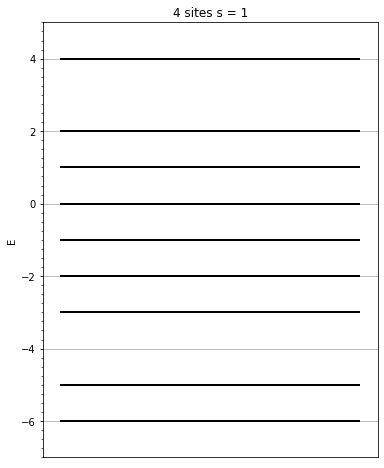

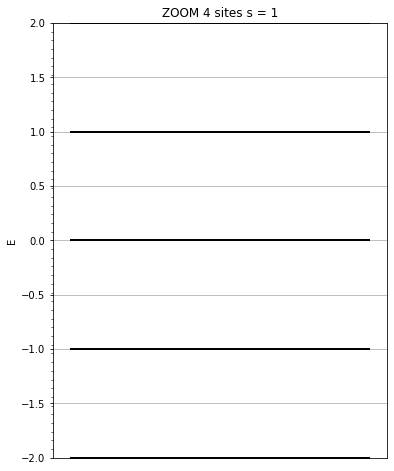

In [120]:
#HEISENBERG HAMILTONIAN FOUR SITES spin = 1

from numpy import kron, dot

S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[1,0,0],
                [0,0,0],
                [0,0,-1]])

I = np.array([[1,0,0],
                [0,1,0],
                [0,0,1]])

S1_plus = kron(kron(kron(S_plus,I),I),I)
S1_minus = kron(kron(kron(S_minus,I),I),I)
S1_z = kron(kron(kron(S_z,I),I),I)

S2_plus = kron(kron(kron(I,S_plus),I),I)
S2_minus = kron(kron(kron(I,S_minus),I),I)
S2_z = kron(kron(kron(I,S_z),I),I)

S3_plus = kron(kron(kron(I,I),S_plus),I)
S3_minus = kron(kron(kron(I,I),S_minus),I)
S3_z = kron(kron(kron(I,I),S_z),I)

S4_plus = kron(kron(kron(I,I),I),S_plus)
S4_minus = kron(kron(kron(I,I),I),S_minus)
S4_z = kron(kron(kron(I,I),I),S_z)

H = 0.5*(dot(S1_plus,S2_minus)+dot(S1_minus,S2_plus)+dot(S2_plus,S3_minus)+dot(S2_minus,S3_plus)\
    +dot(S3_plus,S4_minus)+dot(S3_minus,S4_plus)+dot(S4_plus,S1_minus)+dot(S4_minus,S1_plus)) + dot(S1_z,S2_z) + dot(S2_z,S3_z) + dot(S3_z,S4_z) + dot(S4_z,S1_z)

energies, vectors = np.linalg.eig(H)
#print(np.sort(energies))

x = [1] * len(energies)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('4 sites s = 1')

x = [1] * len(energies)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('ZOOM 4 sites s = 1')
ax.set_ylim([-2, 2])

(-0.1, 0.1)

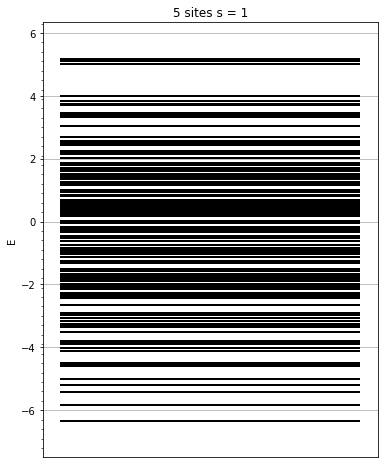

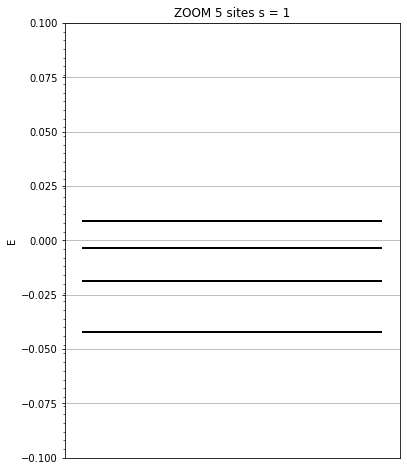

In [118]:
#HEISENBERG HAMILTONIAN FIVE SITES spin = 1

from numpy import kron, dot

S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[1,0,0],
                [0,0,0],
                [0,0,-1]])

I = np.array([[1,0,0],
                [0,1,0],
                [0,0,1]])

S1_plus = kron(kron(kron(kron(S_plus,I),I),I),I)
S1_minus = kron(kron(kron(kron(S_minus,I),I),I),I)
S1_z = kron(kron(kron(kron(S_z,I),I),I),I)

S2_plus = kron(kron(kron(kron(I,S_plus),I),I),I)
S2_minus = kron(kron(kron(kron(I,S_minus),I),I),I)
S2_z = kron(kron(kron(kron(I,S_z),I),I),I)

S3_plus = kron(kron(kron(kron(I,I),S_plus),I),I)
S3_minus = kron(kron(kron(kron(I,I),S_minus),I),I)
S3_z = kron(kron(kron(kron(I,I),S_z),I),I)

S4_plus = kron(kron(kron(kron(I,I),I),S_plus),I)
S4_minus = kron(kron(kron(kron(I,I),I),S_minus),I)
S4_z = kron(kron(kron(kron(I,I),I),S_z),I)

S5_plus = kron(kron(kron(kron(I,I),I),I),S_plus)
S5_minus = kron(kron(kron(kron(I,I),I),I),S_minus)
S5_z = kron(kron(kron(kron(I,I),I),I),S_z)

H = 0.5*(dot(S1_plus,S2_minus)+dot(S1_minus,S2_plus)+dot(S2_plus,S3_minus)+dot(S2_minus,S3_plus)\
    +dot(S3_plus,S4_minus)+dot(S3_minus,S4_plus)+dot(S4_plus,S5_minus)+dot(S4_minus,S5_plus)\
        +dot(S5_plus,S1_minus)+dot(S5_minus,S1_plus)) + dot(S1_z,S2_z) + dot(S2_z,S3_z) + dot(S3_z,S4_z) + dot(S4_z,S1_z)+dot(S5_z,S1_z)

energies, vectors = np.linalg.eig(H)
#print(np.sort(energies))

x = [1] * len(energies)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('5 sites s = 1')

x = [1] * len(energies)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('ZOOM 5 sites s = 1')
ax.set_ylim([-0.1, 0.1])

In [ ]:
#HEISENBERG HAMILTONIAN SIX SITES spin = 1



In [ ]:
#HEISENBERG HAMILTONIAN SEVEN SITES spin = 1

In [ ]:
#HEISENBERG HAMILTONIAN EIGHT SITES spin = 1

In [ ]:
#HEISENBERG HAMILTONIAN NINE SITES spin = 1 ?

In [ ]:
#HEISENBERG HAMILTONIAN TEN SITES spin = 1 ?

Text(0.5, 1.0, '4 sites s = 1/2')

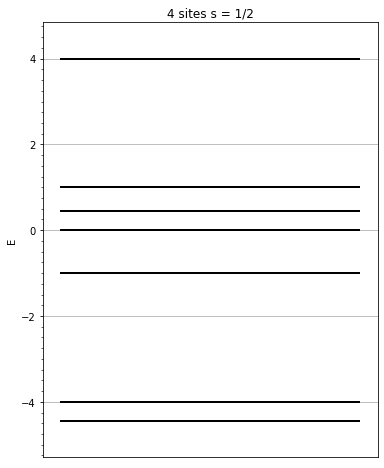

In [109]:
#HEISENBERG HAMILTONIAN FOUR SITES spin = 1/2

from numpy import kron, dot

S_plus = np.array([[0,1],
                [0,0]])
S_minus = np.array([[0,0],
                [1,0]])
S_z = np.array([[1,0],
                [0,-1]])
I = np.array([[1,0],
            [0,1]])

S1_plus = kron(kron(kron(S_plus,I),I),I)
S1_minus = kron(kron(kron(S_minus,I),I),I)
S1_z = kron(kron(kron(S_z,I),I),I)

S2_plus = kron(kron(kron(I,S_plus),I),I)
S2_minus = kron(kron(kron(I,S_minus),I),I)
S2_z = kron(kron(kron(I,S_z),I),I)

S3_plus = kron(kron(kron(I,I),S_plus),I)
S3_minus = kron(kron(kron(I,I),S_minus),I)
S3_z = kron(kron(kron(I,I),S_z),I)

S4_plus = kron(kron(kron(I,I),I),S_plus)
S4_minus = kron(kron(kron(I,I),I),S_minus)
S4_z = kron(kron(kron(I,I),I),S_z)

H = 0.5*(dot(S1_plus,S2_minus)+dot(S1_minus,S2_plus)+dot(S2_plus,S3_minus)+dot(S2_minus,S3_plus)\
    +dot(S3_plus,S4_minus)+dot(S3_minus,S4_plus)+dot(S4_plus,S1_minus)+dot(S4_minus,S1_plus)) + dot(S1_z,S2_z) + dot(S2_z,S3_z) + dot(S3_z,S4_z) + dot(S4_z,S1_z)

energies, vectors = np.linalg.eig(H)
#print(np.sort(energies))

x = [1] * len(energies)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xticks([])
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(50))
ax.scatter(x, energies, c = 'black', s=90000, marker="_", linewidth=2, zorder=3)
ax.grid(axis='y')
ax.margins(0.1)
ax.set_ylabel('E')
ax.set_title('4 sites s = 1/2')

In [49]:
#DRAFT

#HEISENBERG HAMILTONIAN FOUR SITES spin = 2

from numpy import kron, dot

S_plus = np.sqrt(2) * np.array([[0,1,0],
                                [0,0,1],
                                [0,0,0]])

S_minus = np.sqrt(2) * np.array([[0,0,0],
                                [1,0,0],
                                [0,1,0]])
S_z = np.array([[2,0,0,0],
                [0,1,0,0],
                [0,0,0,0],
                [0,0,-1,0],
                [0,0,0,-2]])

I = np.array([[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])


S1_plus = kron(kron(kron(S_plus,I),I),I)
S1_minus = kron(kron(kron(S_minus,I),I),I)
S1_z = kron(kron(kron(S_z,I),I),I)

S2_plus = kron(kron(kron(I,S_plus),I),I)
S2_minus = kron(kron(kron(I,S_minus),I),I)
S2_z = kron(kron(kron(I,S_z),I),I)

S3_plus = kron(kron(kron(I,I),S_plus),I)
S3_minus = kron(kron(kron(I,I),S_minus),I)
S3_z = kron(kron(kron(I,I),S_z),I)

S4_plus = kron(kron(kron(I,I),I),S_plus)
S4_minus = kron(kron(kron(I,I),I),S_minus)
S4_z = kron(kron(kron(I,I),I),S_z)

H = 0.5*(dot(S1_plus,S2_minus)+dot(S1_minus,S2_plus)+dot(S2_plus,S3_minus)+dot(S2_minus,S3_plus)\
    +dot(S3_plus,S4_minus)+dot(S3_minus,S4_plus)+dot(S4_plus,S1_minus)+dot(S4_minus,S1_plus)) + dot(S1_z,S2_z) + dot(S2_z,S3_z) + dot(S3_z,S4_z) + dot(S4_z,S1_z)

In [50]:
I

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
energies, vectors = np.linalg.eig(H)
print(np.sort(energies))